In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv
/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv


In [2]:
df=pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv")
import warnings
warnings.filterwarnings("ignore")
print(df.shape)
df.head(10)

(8000, 30)


,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.360,997.904,-1739.99000,630.087,...,NaN,-1043.160,-1942.4900,267.138,NaN,NaN,211.328,-2203.0200,-1180.190,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.320,914.198,-692.38600,707.626,...,NaN,-933.934,-625.3850,120.059,364.8580,476.972,220.878,-2250.0000,-1360.560,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.630,NaN,-1564.63000,NaN,...,-1025.880,368.622,NaN,-1227.800,304.6210,NaN,369.214,-2202.1200,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.930,515.805,-1413.18000,-802.942,...,-1813.950,155.624,NaN,-924.073,432.1500,282.833,298.320,-2197.3600,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.830,1935.800,NaN,2158.980,...,1535.000,1959.430,-279.3170,-384.915,-113.4060,1020.720,1660.650,-116.8010,-568.050,-1357.140
5,8,9,water,1116.8600,NaN,-408.147,1685.700,1046.670,-7.58804,1435.990,...,1287.740,NaN,-561.3470,142.293,48.2714,NaN,1742.290,-60.3867,-1187.450,-1255.100
6,9,10,water,1485.7700,-223.142,727.773,180.491,1779.890,2613.97000,1869.390,...,3192.460,2152.400,-485.5630,NaN,178.7810,1763.990,1480.800,931.3970,-724.129,-1007.910
7,11,12,water,1207.3400,2833.130,-725.103,1720.860,1665.010,1037.84000,388.642,...,875.583,1836.610,78.7805,NaN,-463.4920,762.725,1948.980,41.1520,-1404.070,-1095.370
8,14,15,water,2250.3300,671.599,229.826,1831.990,1842.560,2186.74000,1910.270,...,1555.150,2133.410,1950.3300,1599.420,1430.9100,667.427,1426.470,2480.4900,1794.960,1378.450
9,15,16,water,4568.4600,5011.310,3088.330,2260.560,1864.960,1834.98000,2236.350,...,3973.620,2496.830,4758.1500,4177.900,4663.6600,2640.090,1943.720,4789.5300,4973.420,NaN


In [3]:
df.isnull().sum()

Unnamed: 0       0
ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64

In [4]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
df = df.drop(columns=["Unnamed: 0"])
df.columns

Index(['ID', 'class', '20150720_N', '20150602_N', '20150517_N', '20150501_N',
       '20150415_N', '20150330_N', '20150314_N', '20150226_N', '20150210_N',
       '20150125_N', '20150109_N', '20141117_N', '20141101_N', '20141016_N',
       '20140930_N', '20140813_N', '20140626_N', '20140610_N', '20140525_N',
       '20140509_N', '20140423_N', '20140407_N', '20140322_N', '20140218_N',
       '20140202_N', '20140117_N', '20140101_N'],
      dtype='object')

In [6]:
X = df.drop(columns=["ID", "class"])
y = df["class"]
y

0            water
1            water
2            water
3            water
4            water
           ...    
7995    impervious
7996    impervious
7997    impervious
7998    impervious
7999    impervious
Name: class, Length: 8000, dtype: object

<Axes: >

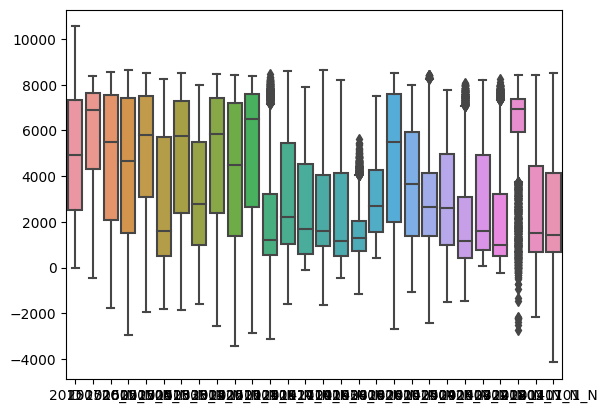

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(df)

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)


In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Step 2: Convert raw NDVI values to real NDVI scale
X_scaled_ndvi = X_imputed / 1000.0

# Step 3: Clip extreme values to [-1, 1]
X_clipped = np.clip(X_scaled_ndvi, -1, 1)

# Step 4: Normalize to [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X_final = scaler.fit_transform(X_clipped)

# Step 5: Encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Step 6: Split for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_final, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Step 7: Train Logistic Regression
model = LogisticRegression(multi_class='multinomial', max_iter=1000)
model.fit(X_train, y_train)

# Step 8: Evaluate accuracy
y_pred = model.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", acc)


Validation Accuracy: 0.810625


In [10]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Impute missing NDVI values with median
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale NDVI values to [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X_imputed)

# Encode target labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Train Logistic Regression model
model = LogisticRegression(multi_class="multinomial", max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")


Validation Accuracy: 0.8681


In [11]:
# Predict on the full training set (replace with test set when available)
df_test = df.copy()  # For real use: pd.read_csv("hacktest.csv")

# Keep ID for submission
ids = df_test["ID"]

# Drop unnecessary columns
X_test = df_test.drop(columns=["ID", "class"])

# Impute and scale
X_test_imputed = imputer.transform(X_test)
X_test_scaled = scaler.transform(X_test_imputed)

# Predict classes
y_test_pred = model.predict(X_test_scaled)
y_test_labels = encoder.inverse_transform(y_test_pred)

# Create submission dataframe
submission_df = pd.DataFrame({
    "ID": ids,
    "class": y_test_labels
})

# Save to CSV
submission_df.to_csv("submission.csv", index=False)
print("Submission file 'submission.csv' created.")


Submission file 'submission.csv' created.


In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import zscore


# Step 2: Convert raw NDVI values to real NDVI scale
X_scaled_ndvi = X_imputed / 1000.0

z_scores = np.abs(zscore(X_scaled_ndvi, nan_policy='omit'))
X_no_outliers = X_scaled_ndvi.copy()
X_no_outliers[z_scores > 3] = np.nan  # Treat outliers as missing

# Step 4: Re-impute after removing outliers
X_no_outliers_imputed = SimpleImputer(strategy='median').fit_transform(X_no_outliers)

# Step 5: Normalize to [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X_final = scaler.fit_transform(X_no_outliers_imputed)

# # Step 4: Normalize to [-1, 1]
# scaler = MinMaxScaler(feature_range=(-1, 1))
# X_final = scaler.fit_transform(X_clipped)

# Step 5: Encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Step 6: Split for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_final, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Step 7: Train Logistic Regression
model = LogisticRegression(multi_class='multinomial', max_iter=1000)
model.fit(X_train, y_train)

# Step 8: Evaluate accuracy
y_pred = model.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", acc)


Validation Accuracy: 0.866875


In [13]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import zscore

# Load Data
train_df = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv")
test_df = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv")

# Drop unwanted column
train_df = train_df.drop(columns=['Unnamed: 0'], errors='ignore')
test_df = test_df.drop(columns=['Unnamed: 0'], errors='ignore')

# Separate features and target
X = train_df.drop(columns=["ID", "class"])
y = train_df["class"]
X_test = test_df.drop(columns=["ID"])

# Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Prepare output holder
submission_dfs = {}

### -------- MODEL 1 -------- ###
# Impute
imp = SimpleImputer(strategy="median")
X_imp = imp.fit_transform(X)
X_test_imp = imp.transform(X_test)

# Scale NDVI
X_scaled = X_imp / 1000.0
X_test_scaled = X_test_imp / 1000.0

# Clip
X_clipped = np.clip(X_scaled, -1, 1)
X_test_clipped = np.clip(X_test_scaled, -1, 1)

# Normalize
scaler1 = MinMaxScaler(feature_range=(-1, 1)).fit(X_clipped)
X_final = scaler1.transform(X_clipped)
X_test_final = scaler1.transform(X_test_clipped)

# Split and Train
X_train, X_val, y_train, y_val = train_test_split(X_final, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)
model1 = LogisticRegression(multi_class='multinomial', max_iter=1000)
model1.fit(X_train, y_train)

# Accuracy and Predictions
val_acc_1 = accuracy_score(y_val, model1.predict(X_val))
pred_1 = model1.predict(X_test_final)
submission_dfs['Model_1'] = pd.DataFrame({'ID': test_df['ID'], 'class': label_encoder.inverse_transform(pred_1)})

### -------- MODEL 2 -------- ###
X_imp2 = imp.fit_transform(X)
X_test_imp2 = imp.transform(X_test)

scaler2 = MinMaxScaler(feature_range=(-1, 1)).fit(X_imp2)
X_final2 = scaler2.transform(X_imp2)
X_test_final2 = scaler2.transform(X_test_imp2)

X_train2, X_val2, y_train2, y_val2 = train_test_split(X_final2, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)
model2 = LogisticRegression(multi_class="multinomial", max_iter=1000)
model2.fit(X_train2, y_train2)

val_acc_2 = accuracy_score(y_val2, model2.predict(X_val2))
pred_2 = model2.predict(X_test_final2)
submission_dfs['Model_2'] = pd.DataFrame({'ID': test_df['ID'], 'class': label_encoder.inverse_transform(pred_2)})

### -------- MODEL 3 -------- ###
X_scaled3 = X_imp / 1000.0
z = np.abs(zscore(X_scaled3, nan_policy='omit'))
X_out3 = X_scaled3.copy()
X_out3[z > 3] = np.nan
X_out3_imp = SimpleImputer(strategy="median").fit_transform(X_out3)

scaler3 = MinMaxScaler(feature_range=(-1, 1)).fit(X_out3_imp)
X_final3 = scaler3.transform(X_out3_imp)

# Test: same pipeline
X_test_scaled3 = X_test_imp / 1000.0
z_test = np.abs(zscore(X_test_scaled3, nan_policy='omit'))
X_test_scaled3[z_test > 3] = np.nan
X_test_out3_imp = SimpleImputer(strategy="median").fit(X_out3).transform(X_test_scaled3)
X_test_final3 = scaler3.transform(X_test_out3_imp)

X_train3, X_val3, y_train3, y_val3 = train_test_split(X_final3, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)
model3 = LogisticRegression(multi_class="multinomial", max_iter=1000)
model3.fit(X_train3, y_train3)

val_acc_3 = accuracy_score(y_val3, model3.predict(X_val3))
pred_3 = model3.predict(X_test_final3)
submission_dfs['Model_3'] = pd.DataFrame({'ID': test_df['ID'], 'class': label_encoder.inverse_transform(pred_3)})

### Print Accuracies
print(f"Validation Accuracy - Model 1 (clip + scale): {val_acc_1:.4f}")
print(f"Validation Accuracy - Model 2 (scale only):   {val_acc_2:.4f}")
print(f"Validation Accuracy - Model 3 (z-score outlier removal): {val_acc_3:.4f}")

### Save submission files
for name, df in submission_dfs.items():
    df.to_csv(f"{name}_submission.csv", index=False)
    print(f"Saved: {name}_submission.csv")


Validation Accuracy - Model 1 (clip + scale): 0.8106
Validation Accuracy - Model 2 (scale only):   0.8681
Validation Accuracy - Model 3 (z-score outlier removal): 0.8669
Saved: Model_1_submission.csv
Saved: Model_2_submission.csv
Saved: Model_3_submission.csv


In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Load and prepare
train_df = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv")
test_df = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv")
train_df.drop(columns=['Unnamed: 0'], errors='ignore', inplace=True)
test_df.drop(columns=['Unnamed: 0'], errors='ignore', inplace=True)

X = train_df.drop(columns=["ID", "class"])
y = train_df["class"]
X_test = test_df.drop(columns=["ID"])

# --- Model 4: IQR-based row removal ---
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Flag outliers
mask = ~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter data
X_iqr_filtered = X[mask]
y_iqr_filtered = y[mask]

# Impute missing values (post-removal)
imputer = SimpleImputer(strategy='median')
X_iqr_imputed = imputer.fit_transform(X_iqr_filtered)
X_test_imputed = imputer.transform(X_test)

# Normalize
scaler = MinMaxScaler(feature_range=(-1, 1)).fit(X_iqr_imputed)
X_train_final = scaler.transform(X_iqr_imputed)
X_test_final = scaler.transform(X_test_imputed)

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y_iqr_filtered)

# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(
    X_train_final, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Train Model
model4 = LogisticRegression(multi_class="multinomial", max_iter=1000)
model4.fit(X_train, y_train)

# Validation Accuracy
val_pred_4 = model4.predict(X_val)
val_acc_4 = accuracy_score(y_val, val_pred_4)
pred = model4.predict(X_test_final)
print(f"Validation Accuracy - Model 4 (IQR + row deletion): {val_acc_4:.4f}")
df = pd.DataFrame({'ID': test_df['ID'], 'class': encoder.inverse_transform(pred)})
df.to_csv("SubmissionModel4.csv", index=False)

Validation Accuracy - Model 4 (IQR + row deletion): 0.8674


In [15]:
# --- Model 5: IQR outlier handling by replacing with median ---
X_orig = X.copy()

# Compute IQR
Q1 = X_orig.quantile(0.25)
Q3 = X_orig.quantile(0.75)
IQR = Q3 - Q1

# Outlier mask
outlier_mask = ((X_orig < (Q1 - 1.5 * IQR)) | (X_orig > (Q3 + 1.5 * IQR)))

# Replace outliers with column medians
X_iqr_fixed = X_orig.copy()
for col in X_iqr_fixed.columns:
    median_val = X_iqr_fixed[col].median()
    X_iqr_fixed.loc[outlier_mask[col], col] = median_val

# Impute (if any missing left)
imputer = SimpleImputer(strategy='median')
X_fixed_imputed = imputer.fit_transform(X_iqr_fixed)
X_test_imputed = imputer.transform(X_test)

# Scale
scaler = MinMaxScaler(feature_range=(-1, 1)).fit(X_fixed_imputed)
X_train_final = scaler.transform(X_fixed_imputed)
X_test_final = scaler.transform(X_test_imputed)

# Encode
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(
    X_train_final, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Train Model
model5 = LogisticRegression(multi_class="multinomial", max_iter=1000)
model5.fit(X_train, y_train)

# Validation Accuracy
val_pred_5 = model5.predict(X_val)
val_acc_5 = accuracy_score(y_val, val_pred_5)
pred = model5.predict(X_test_final)
print(f"Validation Accuracy - Model 5 (IQR + value replacement): {val_acc_5:.4f}")
df = pd.DataFrame({'ID': test_df['ID'], 'class': encoder.inverse_transform(pred)})
df.to_csv("SubmissionModel5.csv", index=False)


Validation Accuracy - Model 5 (IQR + value replacement): 0.8606


In [16]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train_df = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv")
test_df = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv")
train_df = train_df.drop(columns=['Unnamed: 0'], errors='ignore')
test_df = test_df.drop(columns=['Unnamed: 0'], errors='ignore')

# Separate features and labels
X_train = train_df.drop(columns=['ID', 'class'])
y_train = train_df['class']
X_test = test_df.drop(columns=['ID'])

# Combine for uniform preprocessing
combined = pd.concat([X_train, X_test], ignore_index=True)

# Step 1: Impute missing values using KNN
imputer = KNNImputer(n_neighbors=3)
combined_imputed = imputer.fit_transform(combined)

# Step 2: NDVI scaling and clipping to [-1, 1]
combined_scaled = combined_imputed / 1000.0
combined_scaled = np.clip(combined_scaled, -1, 1)

# Step 3: Feature Engineering
mean_vals = np.mean(combined_scaled, axis=1).reshape(-1, 1)
std_vals = np.std(combined_scaled, axis=1).reshape(-1, 1)
min_vals = np.min(combined_scaled, axis=1).reshape(-1, 1)
max_vals = np.max(combined_scaled, axis=1).reshape(-1, 1)

# PCA Features
pca = PCA(n_components=3)
pca_features = pca.fit_transform(combined_scaled)

# Temporal Differencing (1st order)
diff_features = np.diff(combined_scaled, axis=1)
diff_mean = np.mean(diff_features, axis=1).reshape(-1, 1)
diff_std = np.std(diff_features, axis=1).reshape(-1, 1)

# Concatenate all features
combined_features = np.hstack([
    combined_scaled,
    mean_vals, std_vals, min_vals, max_vals,
    pca_features,
    diff_mean, diff_std
])

# Split back to train/test
X_train_combined = combined_features[:len(X_train)]
X_test_combined = combined_features[len(X_train):]

# Encode target labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y_train)

# Train-validation split
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_combined, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Train Logistic Regression with class_weight balanced
model = LogisticRegression(multi_class='multinomial', max_iter=2000, class_weight='balanced')
model.fit(X_tr, y_tr)

# Evaluate validation accuracy
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Predict on test data
pred = model.predict(X_test_combined)
submission_df = pd.DataFrame({'ID': test_df['ID'], 'class': encoder.inverse_transform(pred)})

# Save to CSV
submission_path = "SubmissionModel7.csv"
submission_df.to_csv(submission_path, index=False)